# BANK LOAN ANALYSIS REPORT

####  Using pandas library to import the dataset for analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing the dataset .csv

In [ ]:
df=pd.read_excel(r"D:\Data Analytics\financial_loan.xlsx")

#### Checking the dataset import validity

In [ ]:
df.head()  ## checking the top 5 rows
df.tail()  ## checking the bottom 5 rows
df.shape    ## total rows and columns of the dataset imported

<bound method NDFrame.describe of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat

### 1. Total Loan applications, MTD loan applications

In [15]:
total_counts = df['id'].count()
print("Total applicaiton id:  ", total_counts)

Total applicaiton id:   38576


In [42]:
latest_date = df['issue_date'].max()
latest_month = latest_date.month
latest_year = latest_date.year

mtd_data = df[(df['issue_date'].dt.year== latest_year) & (df['issue_date'].dt.month== latest_month)]
mtd_application = mtd_data['id'].count()
print("Total month to date applications :", mtd_application)


Total month to date applications : 4314


### 2. Total Funded Amount

In [21]:
total_amount = df['loan_amount'].sum()
print("Total Funded amount is: ",total_amount)    ## Non-formatted Amount
amount_million = total_amount/1000000
print("Total Funded Amount (in millions) is: ${:.2f}M" .format(amount_million)) 

Total Funded amount is:  435757075
Total Funded Amount (in millions) is: $435.76M


In [62]:
latest_date = df['issue_date'].max()
latest_month = latest_date.month
latest_year = latest_date.year

mtd_data = df[(df['issue_date'].dt.month ==latest_month)&(df['issue_date'].dt.year==latest_year)]
total_amount=mtd_data['loan_amount'].sum()
print("Total month to date amount reveived: ${:.2f}M ".format(total_amount/1000000))

Total month to date amount reveived: $53.98M 


### 3. Total Amount Received

In [24]:
amount_received = df['total_payment'].sum()
amount_millions = amount_received/1000000
print("Total amount received is: ", amount_received)
print("Total amount received (in millions) is: ${:.2f}M".format(amount_millions))

Total amount received is:  473070933
Total amount received (in millions) is: $473.07M


In [49]:
latest_date = df['issue_date'].max()
latest_month = latest_date.month
latest_year = latest_date.year

mtd_data = df[(df['issue_date'].dt.month ==latest_month)&(df['issue_date'].dt.year==latest_year)]
total_amount=mtd_data['total_payment'].sum()
print("Total month to date amount reveived: ${:.2f}M ".format(total_amount/1000000))

Total month to date amount reveived: $58.07M 


## -------From the above analysis, we can clearly see that the loan amount provided to the clients is lower than the payments received, which is a positive result for the Bank.---------


### 4. Average Interest Rate

In [28]:
average = df['int_rate'].mean()
average
average_rate = average * 100 
print("The average interest rate is : {:.2f}%".format(average_rate))

The average interest rate is : 12.05%


### 5. Average Debt to Income Ration (DTI)

In [61]:
average_dti = df['dti'].mean()
print("The aerage dti ratio is : {:.2f}%".format((average_dti*100)))

The aerage dti ratio is : 13.33%


## Good Loan vs Bad Loan Applications

In [ ]:
total_applications=df['id'].count()
total_applications

good_applicaitons = df[(df['loan_status']).isin(['Fully Paid','Current'])]
good_applicaitons_counts = good_applicaitons['id'].count()
good_applicaitons_amount = good_applicaitons['loan_amount'].sum()

good_applicaiton_percentage = (good_applicaitons_counts/total_applications)*100
good_applicaiton_percentage

print("Good_application_percentage = {:.2f}%".format(good_applicaiton_percentage))      ## Good loans percentage
print("Good loan amount = ${:.2f}M".format((good_applicaitons_amount)/1000000))         ## Good loans amount



Good_application_percentage = 86.18%
Good loan amount = $370.22M


In [ ]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]
bad_loan_amount = bad_loans['loan_amount'].sum()
bad_loan_percentage = (bad_loans['id'].count()/df['id'].count())*100

print("Bad loan percentage = {:.2f}%".format(bad_loan_percentage))      ## Bad loans percentage
print("Bad loan amount = ${:.2f}M".format((bad_loan_amount)/1000000))       ## Bad loans amount

Bad loan percentage = 13.82%
Bad loan amount = $65.53M


## Charts/Illustrations

### Monthly trends by issue date

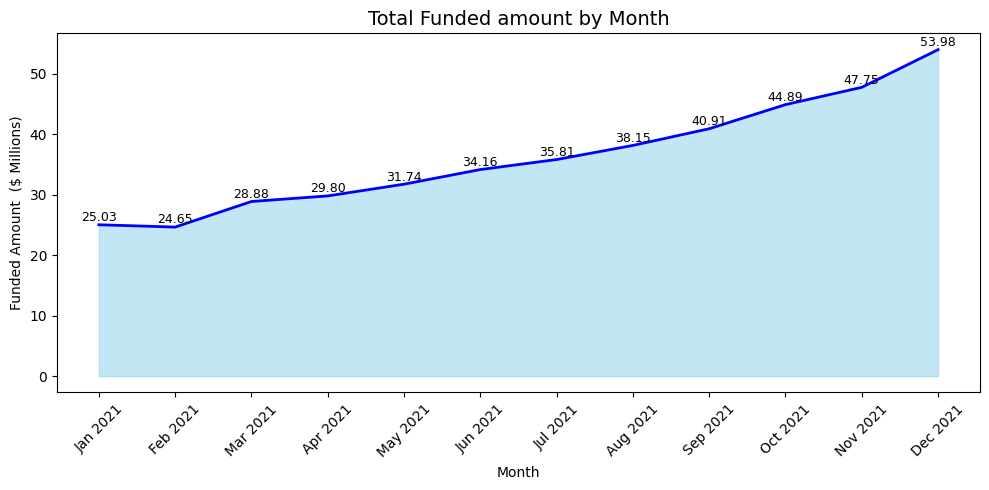

In [ ]:
monthly_funded = (df.sort_values('issue_date')
        .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
        .groupby('month_name', sort=False)['loan_amount']
        .sum().div(1000000).reset_index(name='loan_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'], color = 'blue', linewidth = 2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation =0, color= 'black')
    
plt.title('Total Funded amount by Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount  ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), label = monthly_funded['month_name'], rotation=45)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Amount Received


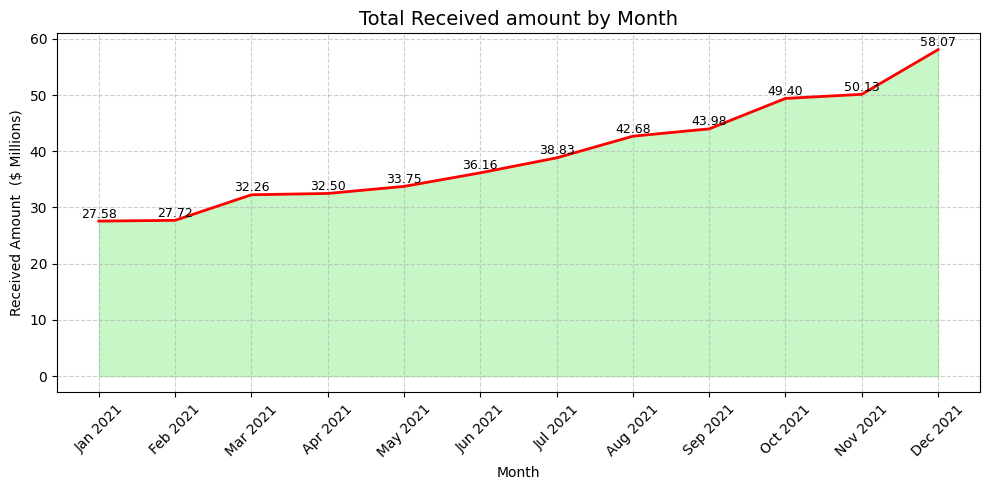

In [23]:
monthly_funded = (df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))  
    .groupby('month_name', sort=False)['total_payment']
    .sum().div(1000000).reset_index(name='received_amount_millions'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['received_amount_millions'],color='lightgreen',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['received_amount_millions'], color = 'red', linewidth = 2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['received_amount_millions']+0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation =0, color= 'black')
    
plt.title('Total Received amount by Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Received Amount  ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), label = monthly_funded['month_name'], rotation=45)
plt.tight_layout()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

### Monthly Trends by Issue  Date for Total Loan Applications

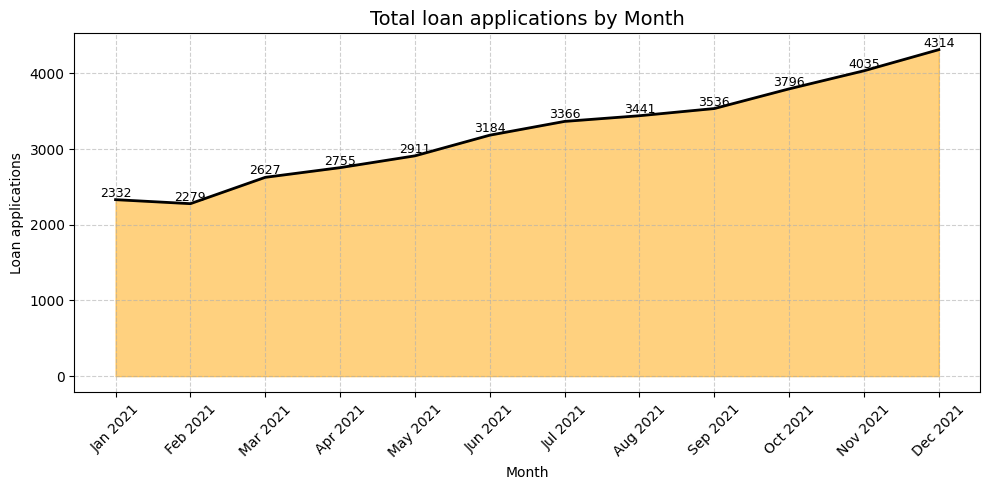

In [28]:
monthly_funded = (df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))  
    .groupby('month_name', sort=False)['id']
    .count().reset_index(name='loan_applications_count'))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_applications_count'],color='orange',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_applications_count'], color = 'black', linewidth = 2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['loan_applications_count']+0.1, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation =0, color= 'black')
    
plt.title('Total loan applications by Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Loan applications')
plt.xticks(ticks=range(len(monthly_funded)), label = monthly_funded['month_name'], rotation=45)
plt.tight_layout()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

### Regional Analysis by State for Total Funded Amount

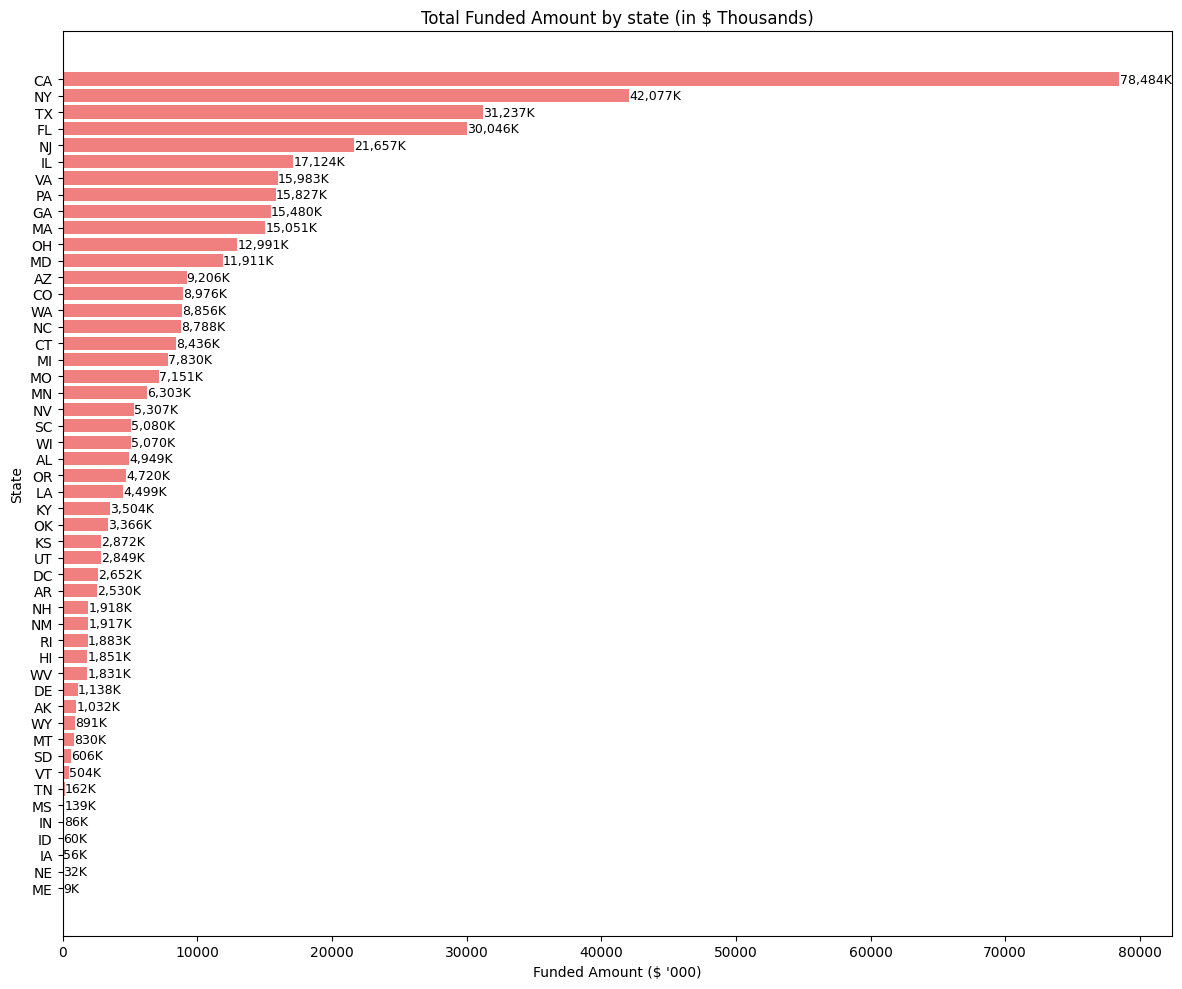

In [34]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding/1000

plt.figure(figsize = (12,10))
bars = plt.barh(state_funding_thousands.index,state_funding_thousands.values, color = 'lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y()+bar.get_height()/2,
             f'{width:,.0f}K', va= 'center', fontsize=9)
    
plt.title('Total Funded Amount by state (in $ Thousands)')
plt.xlabel('Funded Amount ($ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount

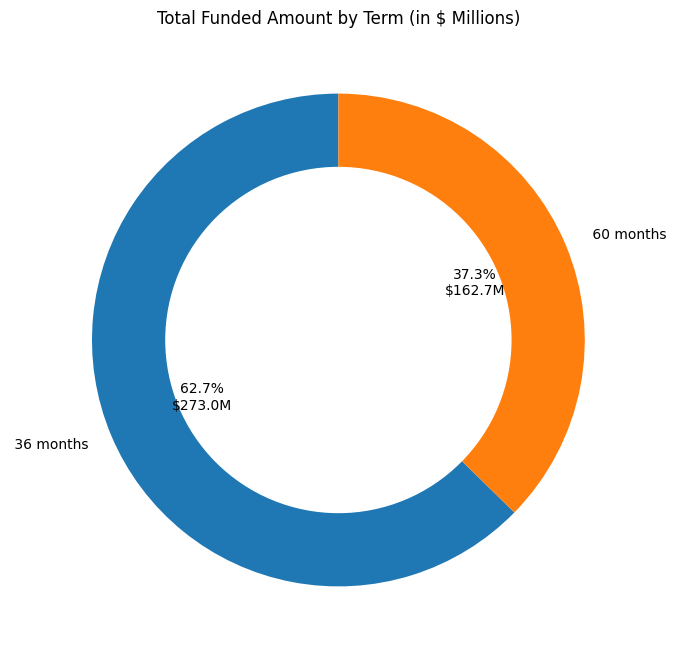

In [35]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000


plt.figure(figsize = (10,8))
plt.pie(term_funding_millions,
        labels = term_funding_millions.index,
        autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
        startangle=90,
        wedgeprops={'width':0.4})

plt.gca().add_artist(plt.Circle((0,0),0.70, color= 'white'))
plt.title('Total Funded Amount by Term (in $ Millions)')
plt.show()

### Employee Length by Total Fudned Amount


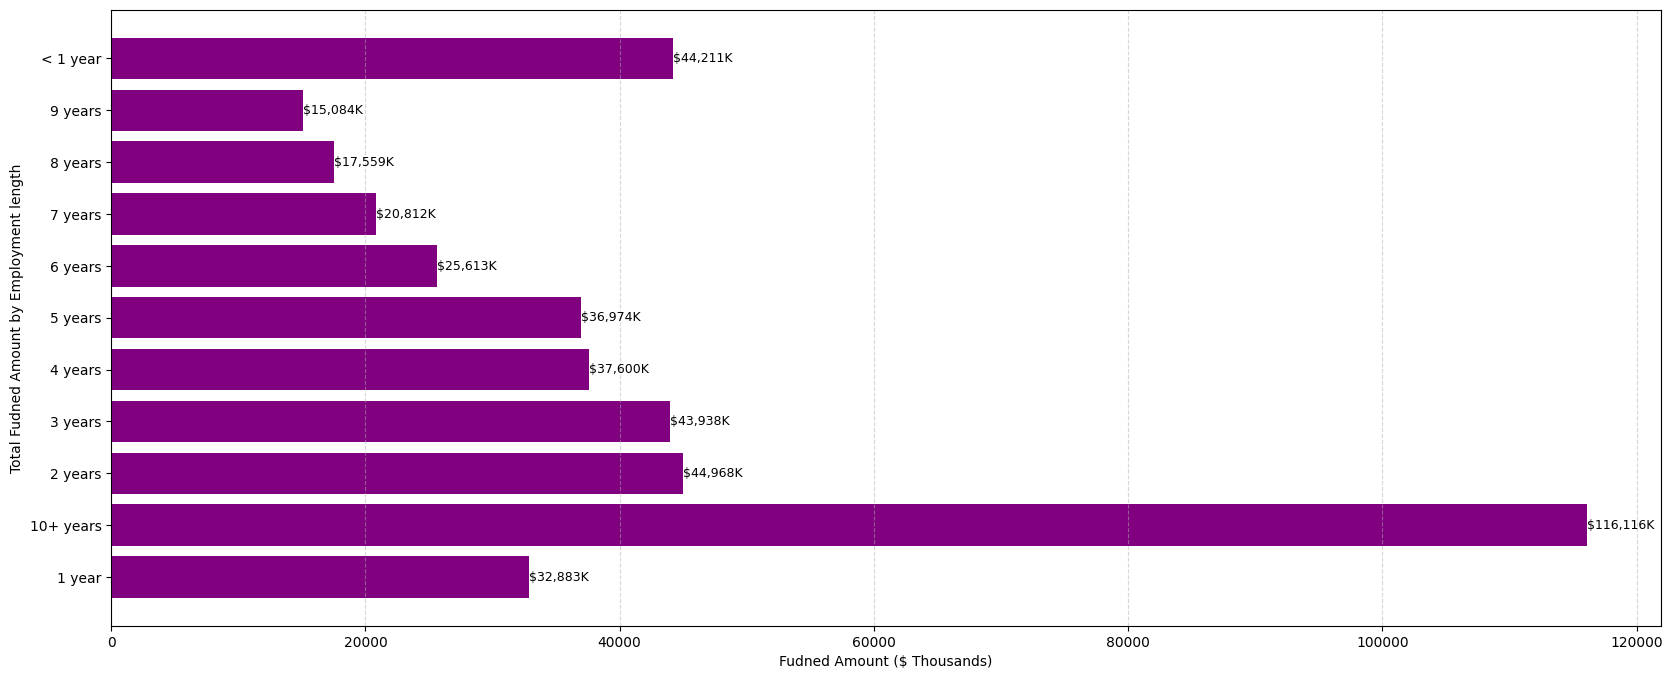

In [45]:
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum()/1000

plt.figure(figsize = (20,8))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y()+ bar.get_height()/2,
        f"${width:,.0f}K", va='center', fontsize=9)


plt.xlabel("Fudned Amount ($ Thousands)")
plt.ylabel('Total Fudned Amount by Employment length')
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.tight_layout
plt.show()


### Loan Purpose by Total Funded Amount

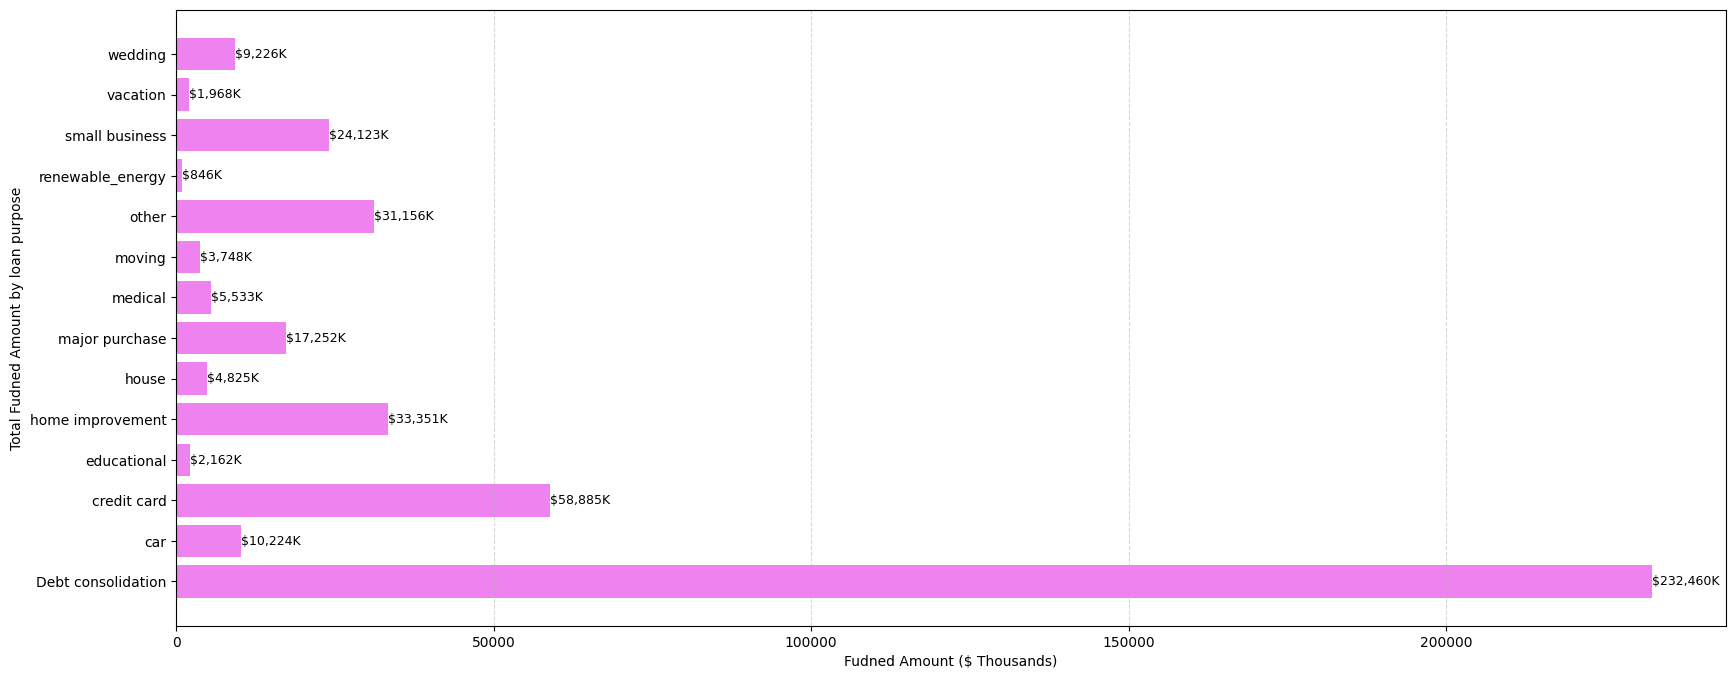

In [49]:
loan_purpose = df.groupby('purpose')['loan_amount'].sum()/1000

plt.figure(figsize = (20,8))
bars = plt.barh(loan_purpose.index, loan_purpose.values, color='violet')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y()+ bar.get_height()/2,
        f"${width:,.0f}K", va='center', fontsize=9)


plt.xlabel("Fudned Amount ($ Thousands)")
plt.ylabel('Total Fudned Amount by loan purpose')
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.tight_layout
plt.show()